In [2]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
P_N = students_data['P_N']  # Liczba studentów
P_ABS = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

/tmp/ipykernel_22869/3412106287.py:7: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_22869/3412106287.py:8: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory

In [3]:
desired_year = 2018
field_of_study = 'informat'
form = 'N'
level = '2'


P_WWZ_MIES = {}
P_WWB_MIES = {}

temp_data = graduates_data[['P_ROKDYP', 'P_KIERUNEK_NAZWA', 'P_FORMA', 'P_POZIOM', 'P_N']].copy()

for i in range(1, 61):
    temp_data[f'P_WWZ_MIES_{i}'] = graduates_data[f'P_WWZ_MIES_{i}'].str.replace(',', '.').astype(float)
    temp_data[f'P_WWB_MIES_{i}'] = graduates_data[f'P_WWB_MIES_{i}'].str.replace(',', '.').astype(float)
    

temp_data = temp_data[temp_data['P_ROKDYP'] == desired_year]
temp_data = temp_data[temp_data['P_FORMA'] == form]
temp_data = temp_data[temp_data['P_POZIOM'] == level]
temp_data = temp_data[temp_data['P_KIERUNEK_NAZWA'].str.contains(field_of_study, case=False, na=False)]

temp_data['P_N'] = temp_data['P_N'].astype(int)
temp_data = temp_data.loc[temp_data.index.repeat(temp_data['P_N'])].reset_index(drop=True)

for i in range(1, 61):
    temp_data = temp_data.dropna(subset=[f'P_WWZ_MIES_{i}', f'P_WWB_MIES_{i}'])
    P_WWZ_MIES[i] = temp_data[f'P_WWZ_MIES_{i}']
    P_WWB_MIES[i] = temp_data[f'P_WWB_MIES_{i}']

temp_data.describe

/tmp/ipykernel_22869/4147489867.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data[f'P_WWZ_MIES_{i}'] = graduates_data[f'P_WWZ_MIES_{i}'].str.replace(',', '.').astype(float)
/tmp/ipykernel_22869/4147489867.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_data[f'P_WWB_MIES_{i}'] = graduates_data[f'P_WWB_MIES_{i}'].str.replace(',', '.').astype(float)
/tmp/ipykernel_22869/4147489867.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

<bound method NDFrame.describe of       P_ROKDYP           P_KIERUNEK_NAZWA P_FORMA P_POZIOM  P_N  P_WWZ_MIES_1  \
0         2018  Informatyka i ekonometria       N        2   16          1.37   
1         2018  Informatyka i ekonometria       N        2   16          1.37   
2         2018  Informatyka i ekonometria       N        2   16          1.37   
3         2018  Informatyka i ekonometria       N        2   16          1.37   
4         2018  Informatyka i ekonometria       N        2   16          1.37   
...        ...                        ...     ...      ...  ...           ...   
1118      2018                Informatyka       N        2   71          1.76   
1119      2018                Informatyka       N        2   71          1.76   
1120      2018                Informatyka       N        2   71          1.76   
1121      2018                Informatyka       N        2   71          1.76   
1122      2018                Informatyka       N        2   71          1.

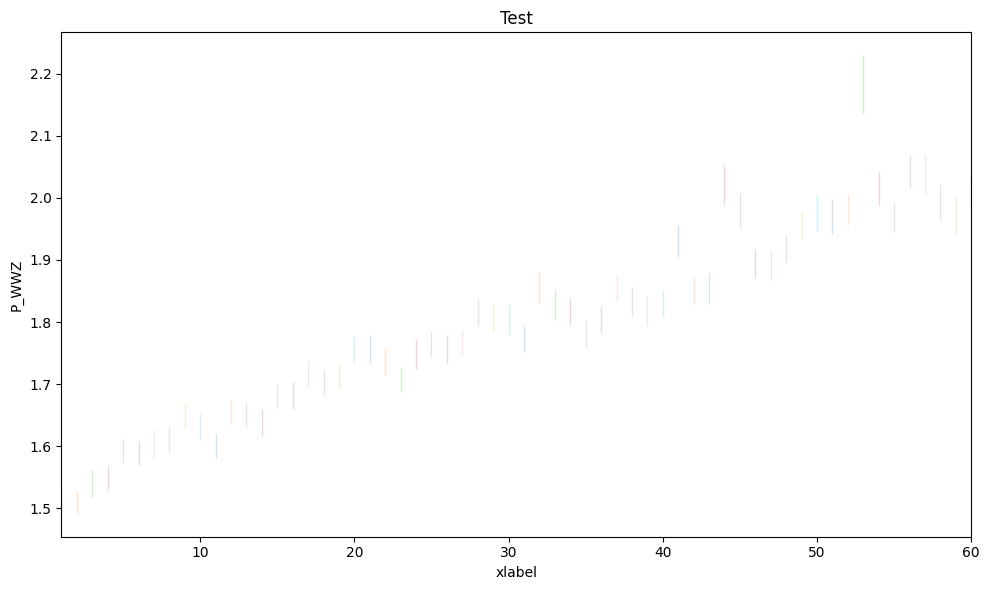

In [4]:
num_bins = 50
x_range = (1, 60)

plt.figure(figsize=(10, 6))
for i in range(1, 61):
    # sns.histplot(
    #     data=temp_data, 
    #     x=f'P_WWZ_MIES_{i}', 
    #     weights='P_N', 
    #     bins=num_bins, 
    #     binrange=x_range, 
    #     kde=False, 
    #     color='blue',
    #     edgecolor="black", 
    #     alpha=0.6, 
    #     stat="count"
    # )
    sns.lineplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')
    # sns.scatterplot(data=temp_data, x=i, y=f'P_WWZ_MIES_{i}')

plt.title('Test')
plt.xlabel('xlabel')
plt.ylabel('P_WWZ')
plt.xlim(x_range)
plt.tight_layout()
plt.show()

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

# Combine P_WWZ_MIES columns into a single time-series dataset
months = list(range(1, 61))
X = np.array(months).reshape(-1, 1)  # Months as features
y = temp_data[[f'P_WWZ_MIES_{i}' for i in months]].median(axis=0).values  # Average salaries across rows for each month

# Prepare future months for predictions (61 to 80)
future_months = np.array(range(61, 360)).reshape(-1, 1)

/tmp/ipykernel_22869/260116992.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


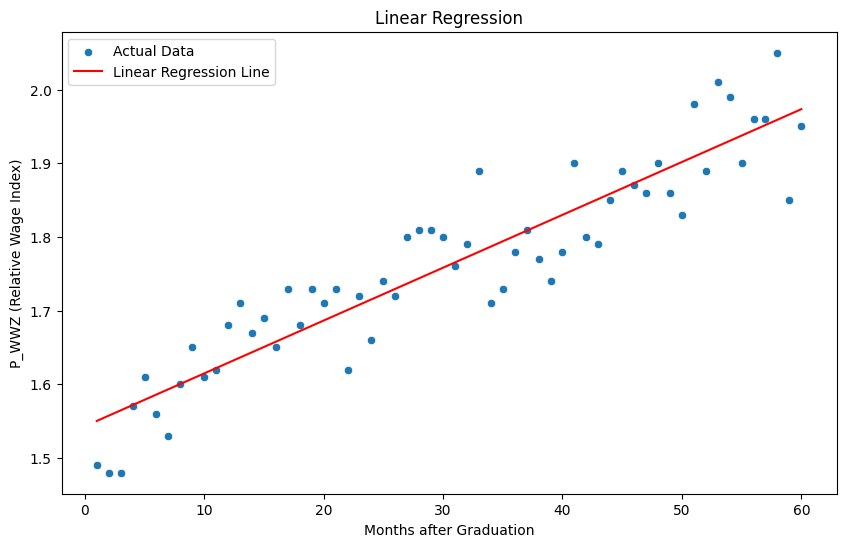

Linear Regression Predictions for months 61-80: [1.98057062 1.98774234 1.99491405 2.00208576 2.00925748 2.01642919
 2.02360091 2.03077262 2.03794434 2.04511605 2.05228777 2.05945948
 2.06663119 2.07380291 2.08097462 2.08814634 2.09531805 2.10248977
 2.10966148 2.11683319]


In [14]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict future salaries (61-80 months)
linear_predictions = linear_model.predict(future_months)

# Visualize data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(months, linear_model.predict(X), color='red', label='Linear Regression Line')
plt.title('Linear Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Linear Regression Predictions for months 61-80: {linear_predictions}")

/tmp/ipykernel_22869/3906324511.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


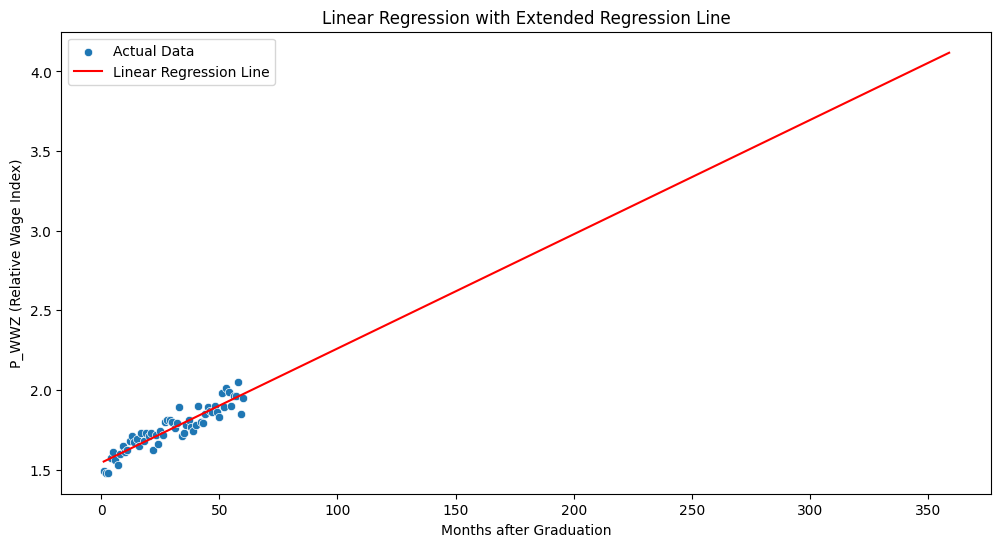

Linear Regression Predictions for months 61-80: [1.98057062 1.98774234 1.99491405 2.00208576 2.00925748 2.01642919
 2.02360091 2.03077262 2.03794434 2.04511605 2.05228777 2.05945948
 2.06663119 2.07380291 2.08097462 2.08814634 2.09531805 2.10248977
 2.10966148 2.11683319 2.12400491 2.13117662 2.13834834 2.14552005
 2.15269177 2.15986348 2.16703519 2.17420691 2.18137862 2.18855034
 2.19572205 2.20289377 2.21006548 2.2172372  2.22440891 2.23158062
 2.23875234 2.24592405 2.25309577 2.26026748 2.2674392  2.27461091
 2.28178262 2.28895434 2.29612605 2.30329777 2.31046948 2.3176412
 2.32481291 2.33198463 2.33915634 2.34632805 2.35349977 2.36067148
 2.3678432  2.37501491 2.38218663 2.38935834 2.39653005 2.40370177
 2.41087348 2.4180452  2.42521691 2.43238863 2.43956034 2.44673206
 2.45390377 2.46107548 2.4682472  2.47541891 2.48259063 2.48976234
 2.49693406 2.50410577 2.51127748 2.5184492  2.52562091 2.53279263
 2.53996434 2.54713606 2.55430777 2.56147949 2.5686512  2.57582291
 2.58299463 2.5

In [58]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict future salaries (61-80 months)
linear_predictions = linear_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_months = np.concatenate([X.flatten(), future_months.flatten()])
all_predictions = np.concatenate([linear_model.predict(X), linear_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(all_months, all_predictions, color='red', label='Linear Regression Line')
plt.title('Linear Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Linear Regression Predictions for months 61-80: {linear_predictions}")

/tmp/ipykernel_22869/3759397069.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


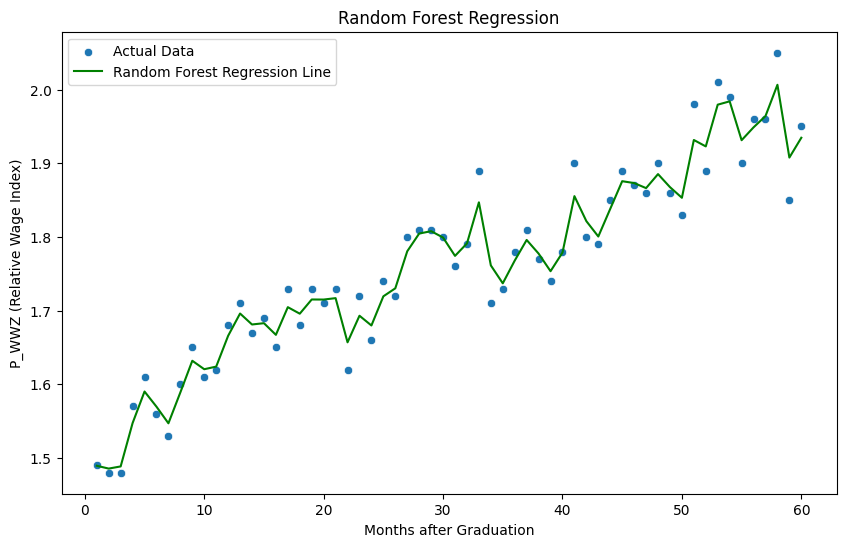

Random Forest Regression Predictions for months 61-80: [1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461
 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461 1.93461
 1.93461 1.93461]


In [17]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X, y)

# Predict future salaries (61-80 months)
rf_predictions = rf_model.predict(future_months)

# Visualize data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(months, rf_model.predict(X), color='green', label='Random Forest Regression Line')
plt.title('Random Forest Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Random Forest Regression Predictions for months 61-80: {rf_predictions}")

/tmp/ipykernel_22869/1797184104.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


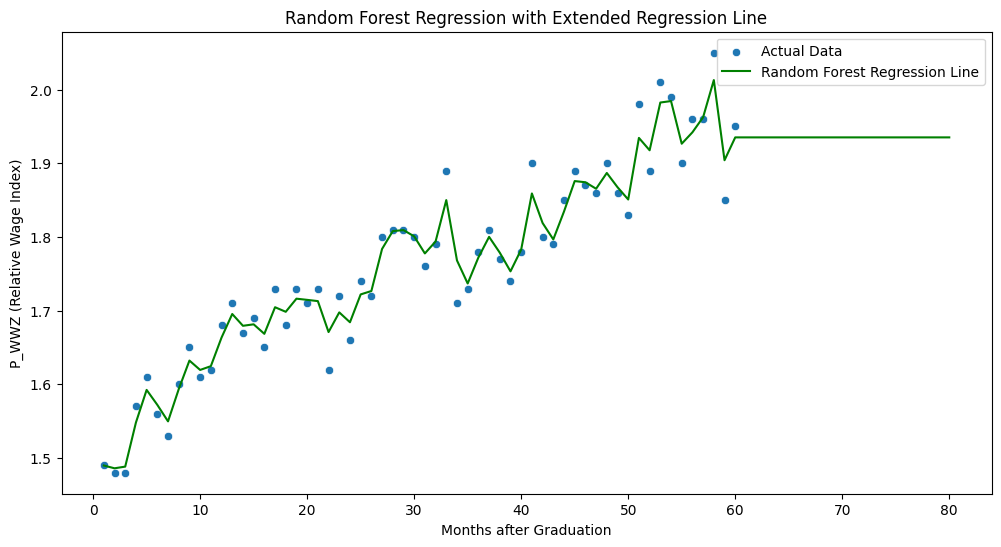

Random Forest Regression Predictions for months 61-80: [1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351
 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351 1.9351]


In [16]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict future salaries (61-80 months)
rf_predictions = rf_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([rf_model.predict(X), rf_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(all_months, all_predictions, color='green', label='Random Forest Regression Line')
plt.title('Random Forest Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Random Forest Regression Predictions for months 61-80: {rf_predictions}")



/tmp/ipykernel_22869/389506941.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


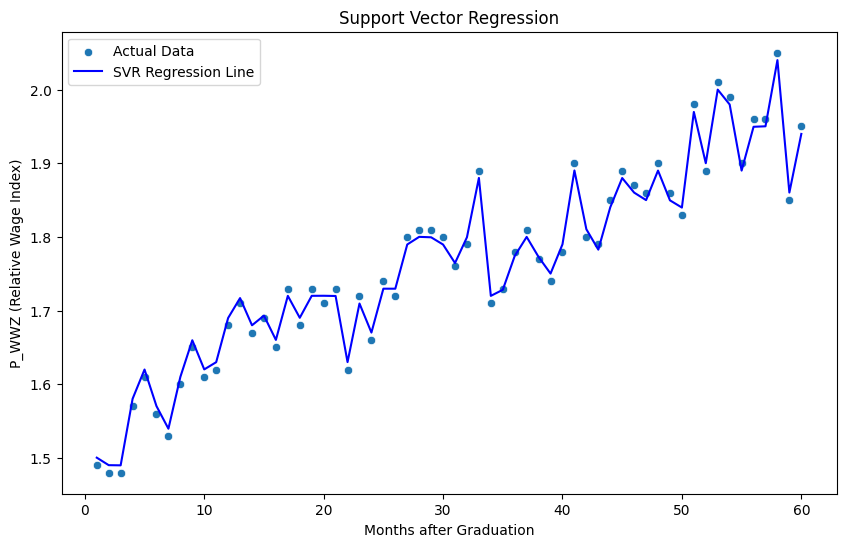

SVR Predictions for months 61-80: [1.83547198 1.76565015 1.76194745 1.76192229 1.76192227 1.76192227
 1.76192227 1.76192227 1.76192227 1.76192227 1.76192227 1.76192227
 1.76192227 1.76192227 1.76192227 1.76192227 1.76192227 1.76192227
 1.76192227 1.76192227]


In [18]:
# Support Vector Regression
svr_model = SVR(kernel='rbf', C=500, gamma='auto', epsilon=0.01)
svr_model.fit(X, y)

# Predict future salaries (61-80 months)
svr_predictions = svr_model.predict(future_months)

# Visualize data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(months, svr_model.predict(X), color='blue', label='SVR Regression Line')
plt.title('Support Vector Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"SVR Predictions for months 61-80: {svr_predictions}")

/tmp/ipykernel_22869/2380987261.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


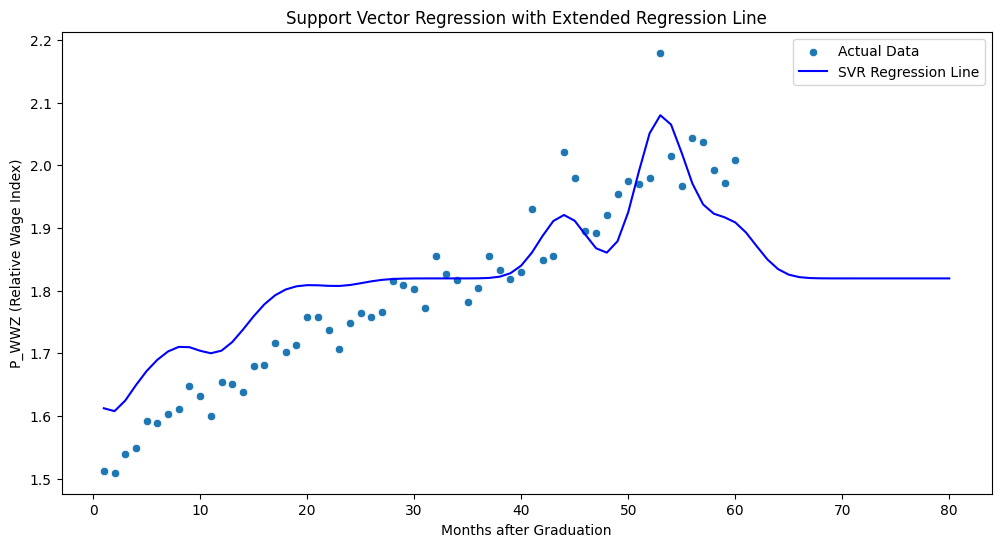

SVR Predictions for months 61-80: [1.89279093 1.87099413 1.84982278 1.83428872 1.82542109 1.82141708
 1.81997262 1.81955356 1.81945535 1.8194367  1.81943382 1.81943346
 1.81943342 1.81943342 1.81943342 1.81943342 1.81943342 1.81943342
 1.81943342 1.81943342]


In [11]:
# Support Vector Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X, y)

# Predict future salaries (61-80 months)
svr_predictions = svr_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([svr_model.predict(X), svr_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(all_months, all_predictions, color='blue', label='SVR Regression Line')
plt.title('Support Vector Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"SVR Predictions for months 61-80: {svr_predictions}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 21
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 1
[LightGBM] [Info] Start training from score 1.797817
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/tmp/ipykernel_22869/3603008533.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')


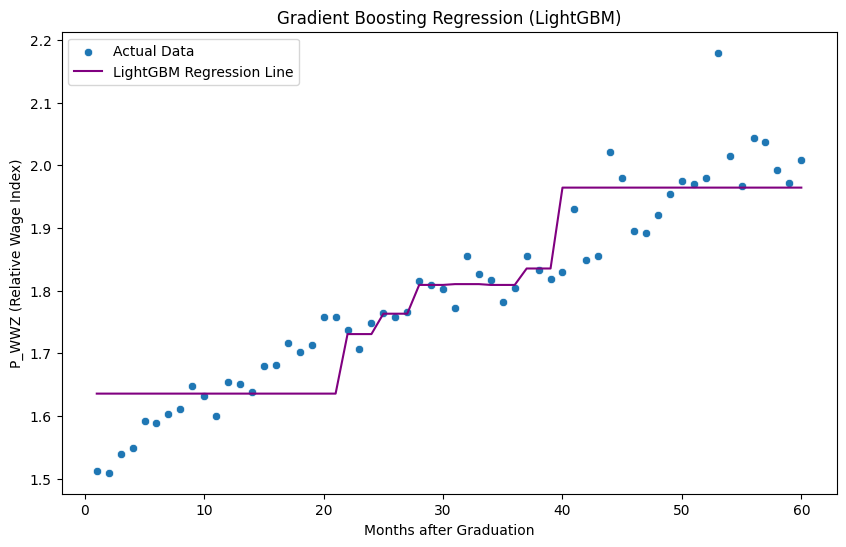

LightGBM Predictions for months 61-80: [1.96434489 1.96434489 1.96434489 1.96434489 1.96434489 1.96434489
 1.96434489 1.96434489 1.96434489 1.96434489 1.96434489 1.96434489
 1.96434489 1.96434489 1.96434489 1.96434489 1.96434489 1.96434489
 1.96434489 1.96434489]


In [12]:
# Gradient Boosting Regression (LightGBM)
gb_model = lgb.LGBMRegressor()
gb_model.fit(X, y)

# Predict future salaries (61-80 months)
gb_predictions = gb_model.predict(future_months)

# Visualize data and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=months, y=y, label='Actual Data', palette='bright')
plt.plot(months, gb_model.predict(X), color='purple', label='LightGBM Regression Line')
plt.title('Gradient Boosting Regression (LightGBM)')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"LightGBM Predictions for months 61-80: {gb_predictions}")

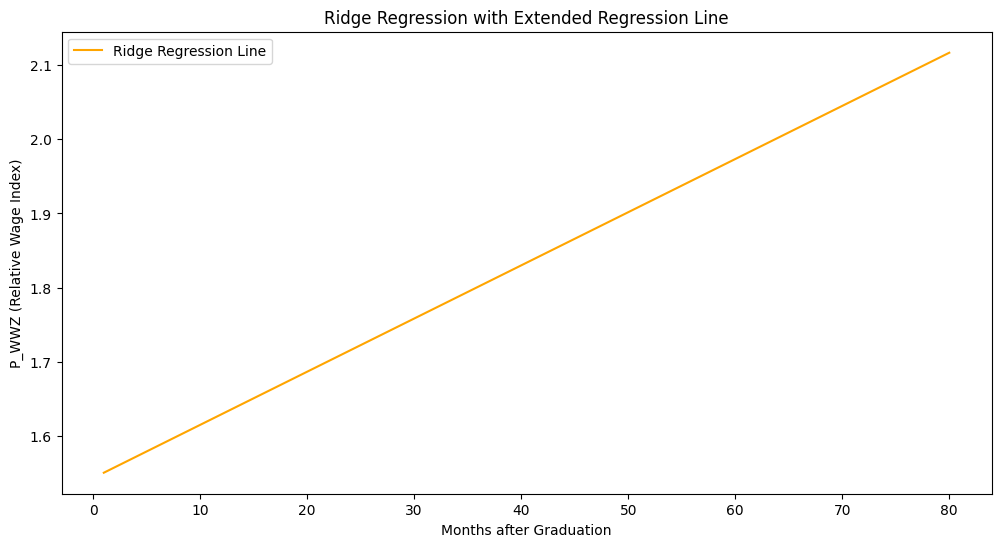

Ridge Regression Predictions for months 61-80: [1.98055847 1.98772978 1.9949011  2.00207241 2.00924373 2.01641505
 2.02358636 2.03075768 2.03792899 2.04510031 2.05227163 2.05944294
 2.06661426 2.07378557 2.08095689 2.0881282  2.09529952 2.10247084
 2.10964215 2.11681347]


In [20]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Predict future salaries (61-80 months)
ridge_predictions = ridge_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([ridge_model.predict(X), ridge_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
plt.plot(all_months, all_predictions, color='orange', label='Ridge Regression Line')
plt.title('Ridge Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Ridge Regression Predictions for months 61-80: {ridge_predictions}")


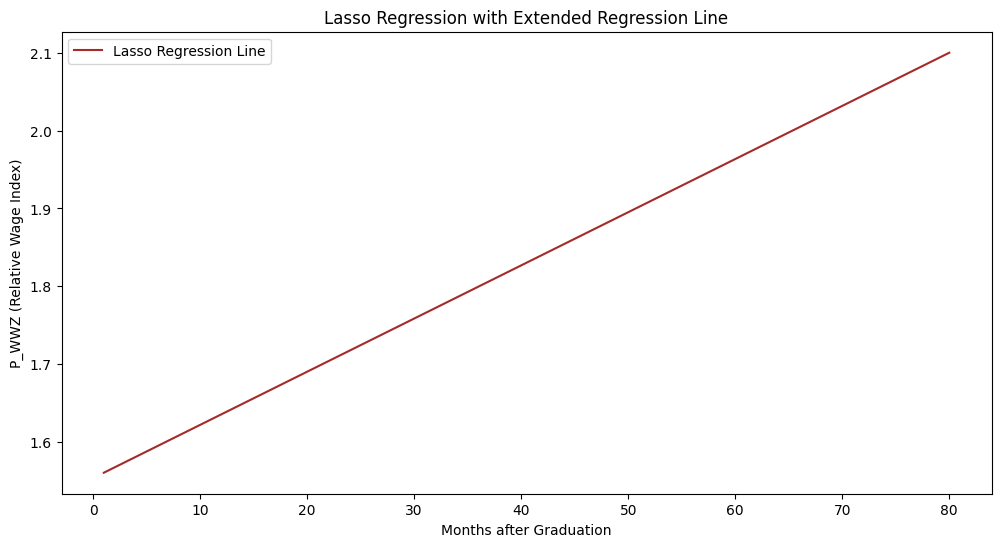

Lasso Regression Predictions for months 61-80: [1.97040113 1.97723942 1.98407771 1.990916   1.99775428 2.00459257
 2.01143086 2.01826915 2.02510744 2.03194573 2.03878401 2.0456223
 2.05246059 2.05929888 2.06613717 2.07297546 2.07981374 2.08665203
 2.09349032 2.10032861]


In [21]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X, y)

# Predict future salaries (61-80 months)
lasso_predictions = lasso_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([lasso_model.predict(X), lasso_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
plt.plot(all_months, all_predictions, color='brown', label='Lasso Regression Line')
plt.title('Lasso Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Lasso Regression Predictions for months 61-80: {lasso_predictions}")

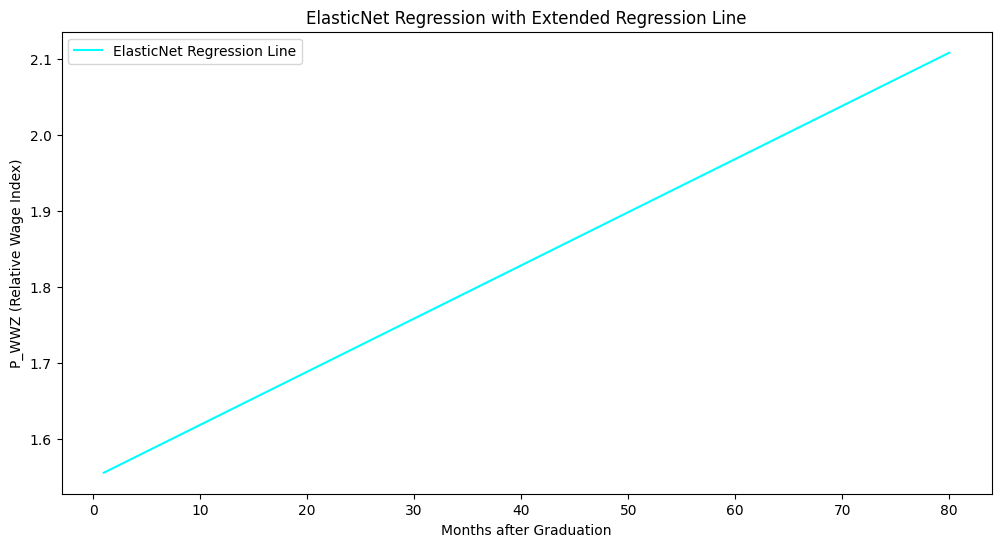

ElasticNet Regression Predictions for months 61-80: [1.97545026 1.9824541  1.98945793 1.99646176 2.0034656  2.01046943
 2.01747327 2.0244771  2.03148093 2.03848477 2.0454886  2.05249243
 2.05949627 2.0665001  2.07350394 2.08050777 2.0875116  2.09451544
 2.10151927 2.1085231 ]


In [22]:
from sklearn.linear_model import ElasticNet

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X, y)

# Predict future salaries (61-80 months)
elasticnet_predictions = elasticnet_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([elasticnet_model.predict(X), elasticnet_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
plt.plot(all_months, all_predictions, color='cyan', label='ElasticNet Regression Line')
plt.title('ElasticNet Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"ElasticNet Regression Predictions for months 61-80: {elasticnet_predictions}")

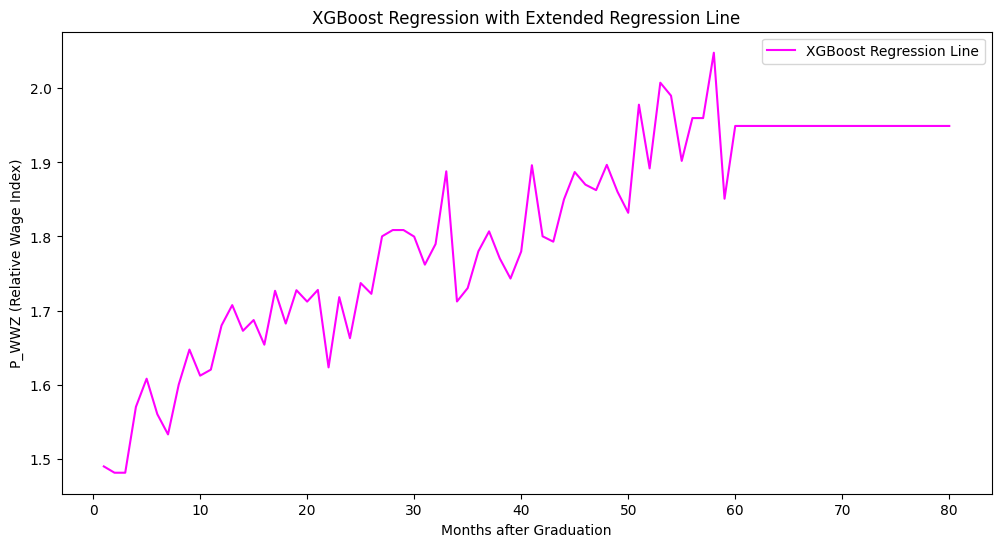

XGBoost Regression Predictions for months 61-80: [1.9492736 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736
 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736
 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736 1.9492736]


In [24]:
from xgboost import XGBRegressor

# XGBoost Regression
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X, y)

# Predict future salaries (61-80 months)
xgb_predictions = xgb_model.predict(future_months)

# Combine months 1-80 and their corresponding predicted values
all_predictions = np.concatenate([xgb_model.predict(X), xgb_predictions])

# Visualize regression line
plt.figure(figsize=(12, 6))
plt.plot(all_months, all_predictions, color='magenta', label='XGBoost Regression Line')
plt.title('XGBoost Regression with Extended Regression Line')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"XGBoost Regression Predictions for months 61-80: {xgb_predictions}")

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
future_months_tensor = torch.tensor(future_months, dtype=torch.float32)

# Dataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

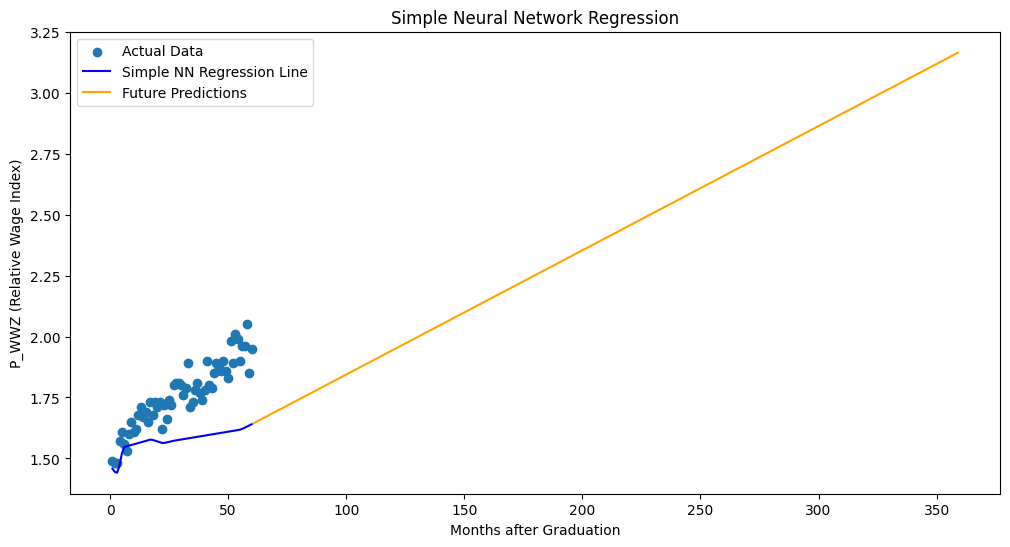

Simple NN Predictions for months 61-80: [1.6452338 1.6503304 1.6554276 1.6605259 1.6656215 1.6707189 1.6758159
 1.6809138 1.6860111 1.6911074 1.6962044 1.7013023 1.7063996 1.7114965
 1.7165939 1.7216913 1.7267889 1.7318851 1.736983  1.7420796 1.747177
 1.7522742 1.7573718 1.7624682 1.7675656 1.7726628 1.7777592 1.7828573
 1.7879544 1.7930533 1.7981502 1.8032452 1.8083447 1.8134402 1.8185383
 1.8236367 1.8287326 1.8338302 1.8389274 1.8440243 1.8491222 1.8542184
 1.8593158 1.8644122 1.8695105 1.8746065 1.8797048 1.8848017 1.8898963
 1.8949953 1.9000927 1.9051903 1.910288  1.915383  1.9204818 1.9255794
 1.9306773 1.9357725 1.9408721 1.9459685 1.9510666 1.9561616 1.9612597
 1.9663566 1.9714552 1.9765517 1.9816483 1.9867445 1.9918426 1.9969391
 2.002037  2.0071347 2.0122292 2.0173297 2.0224261 2.027524  2.0326195
 2.0377178 2.0428157 2.0479121 2.0530088 2.0581057 2.0632036 2.0682995
 2.0733984 2.0784953 2.0835922 2.088689  2.0937884 2.0988843 2.1039813
 2.1090777 2.114177  2.119273  2.12436

In [60]:
# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss, and optimizer
simple_nn = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(simple_nn.parameters(), lr=0.01)

# Train the model
epochs = 500
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        predictions = simple_nn(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()

# Predict future values
simple_nn.eval()
with torch.no_grad():
    predictions = simple_nn(X_tensor).numpy()
    future_predictions = simple_nn(future_months_tensor).numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x=months, y=y, label='Actual Data')
plt.plot(X, predictions, label='Simple NN Regression Line', color='blue')
plt.plot(future_months, future_predictions, label='Future Predictions', color='orange')
plt.title('Simple Neural Network Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Simple NN Predictions for months 61-80: {future_predictions.flatten()}")

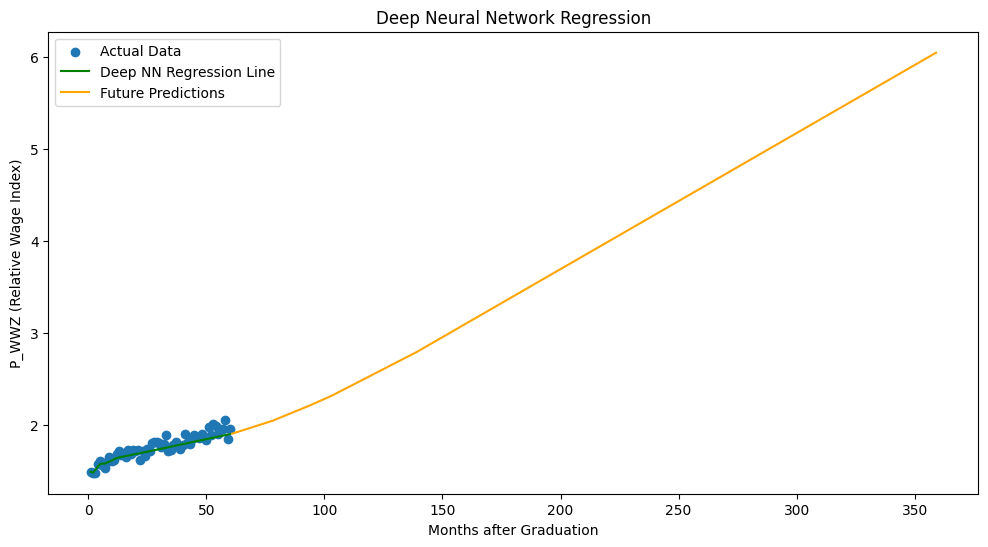

Deep NN Predictions for months 61-80: [1.9043733 1.9123126 1.9205173 1.9287204 1.9369255 1.9451298 1.9533337
 1.9615382 1.969742  1.9779471 1.9861511 1.9943563 2.0025597 2.0107644
 2.018969  2.027172  2.035378  2.0439506 2.0544343 2.0649145 2.0753968
 2.0858765 2.0963583 2.106843  2.1173196 2.1278024 2.138283  2.148765
 2.1592445 2.169726  2.1802073 2.19069   2.201171  2.2123601 2.2237005
 2.23504   2.2463803 2.2577205 2.2690597 2.2804    2.2917395 2.303079
 2.31554   2.3287332 2.3419302 2.355129  2.368325  2.3815224 2.394718
 2.4079144 2.4211113 2.4343078 2.4475043 2.4607031 2.4738986 2.4870918
 2.5002868 2.5134857 2.5266845 2.5398781 2.5530756 2.5662706 2.5794685
 2.5926626 2.6058643 2.6190584 2.632254  2.6454508 2.6586459 2.6718447
 2.6850421 2.6982405 2.7114332 2.72463   2.7378242 2.7510226 2.764218
 2.7774155 2.7913034 2.8061163 2.8209279 2.8357408 2.8505557 2.8653696
 2.8801801 2.8949945 2.909805  2.9246213 2.9394295 2.9542434 2.9690597
 2.9838717 2.9986832 3.0134976 3.0283086 3.

In [61]:
# Define a Deep Neural Network
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(1, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss, and optimizer
deep_nn = DeepNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(deep_nn.parameters(), lr=0.001)

# Train the model
epochs = 500
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        predictions = deep_nn(batch_X)
        loss = criterion(predictions, batch_y)
        loss.backward()
        optimizer.step()

# Predict future values
deep_nn.eval()
with torch.no_grad():
    predictions = deep_nn(X_tensor).numpy()
    future_predictions = deep_nn(future_months_tensor).numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x=months, y=y, label='Actual Data')
plt.plot(X, predictions, label='Deep NN Regression Line', color='green')
plt.plot(future_months, future_predictions, label='Future Predictions', color='orange')
plt.title('Deep Neural Network Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"Deep NN Predictions for months 61-80: {future_predictions.flatten()}")

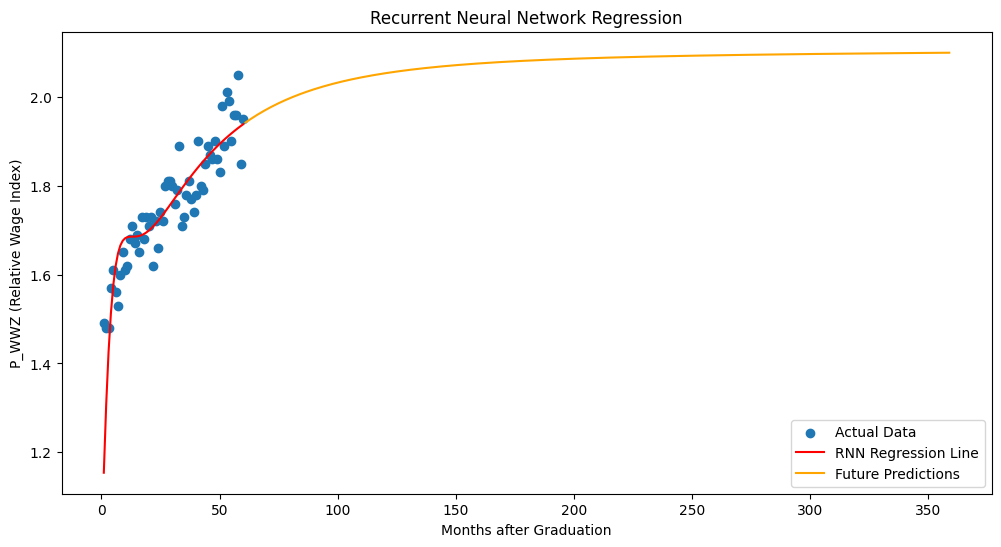

RNN Predictions for months 61-80: [1.9422009 1.9459039 1.9495037 1.9530036 1.9564062 1.9597148 1.9629316
 1.9660597 1.9691014 1.9720595 1.9749367 1.977735  1.9804571 1.9831052
 1.9856813 1.9881878 1.9906268 1.9930003 1.9953103 1.9975586 1.9997472
 2.001878  2.0039525 2.0059724 2.0079393 2.0098555 2.0117216 2.0135393
 2.0153103 2.017036  2.0187175 2.0203562 2.0219536 2.0235105 2.0250285
 2.0265083 2.0279517 2.029359  2.0307317 2.0320706 2.033377  2.0346515
 2.035895  2.037109  2.0382934 2.0394497 2.0405784 2.0416803 2.0427566
 2.0438073 2.044834  2.0458362 2.0468159 2.0477726 2.0487077 2.0496213
 2.0505142 2.051387  2.0522404 2.0530746 2.0538902 2.0546877 2.0554678
 2.0562308 2.056977  2.057707  2.0584216 2.0591207 2.0598047 2.0604742
 2.0611296 2.0617712 2.0623991 2.0630143 2.0636165 2.0642064 2.0647838
 2.0653498 2.0659041 2.0664473 2.0669792 2.0675008 2.068012  2.068513
 2.069004  2.0694854 2.0699573 2.07042   2.070874  2.071319  2.071756
 2.0721838 2.072604  2.073016  2.0734205 2.07

In [62]:
# Define a Recurrent Neural Network
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

# Reshape data for RNN
X_rnn = X_tensor.view(-1, 1, 1)
y_rnn = y_tensor

# Initialize model, loss, and optimizer
rnn = RNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.001)

# Train the model
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = rnn(X_rnn)
    loss = criterion(predictions, y_rnn)
    loss.backward()
    optimizer.step()

# Predict future values
rnn.eval()
with torch.no_grad():
    predictions = rnn(X_rnn).numpy()
    future_predictions = rnn(future_months_tensor.view(-1, 1, 1)).numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x=months, y=y, label='Actual Data')
plt.plot(X, predictions, label='RNN Regression Line', color='red')
plt.plot(future_months, future_predictions, label='Future Predictions', color='orange')
plt.title('Recurrent Neural Network Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"RNN Predictions for months 61-80: {future_predictions.flatten()}")

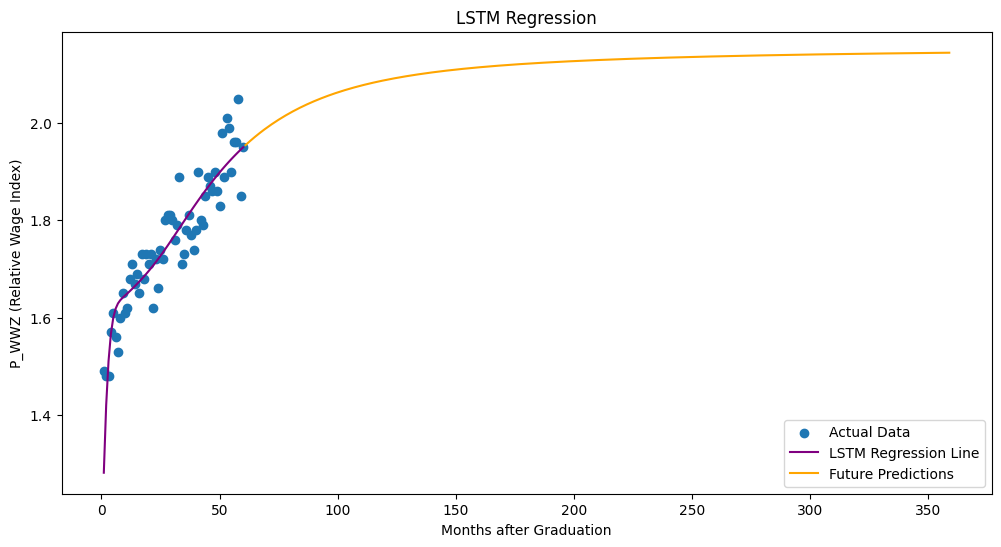

LSTM Predictions for months 61-80: [1.9545827 1.9589776 1.9632596 1.9674312 1.9714948 1.9754523 1.9793063
 1.9830594 1.9867135 1.9902713 1.9937352 1.9971073 2.0003903 2.003586
 2.006697  2.0097256 2.012674  2.0155442 2.0183384 2.0210588 2.0237074
 2.0262864 2.0287971 2.0312424 2.0336232 2.0359418 2.0382001 2.0403996
 2.042542  2.0446293 2.0466626 2.0486434 2.0505738 2.0524547 2.054288
 2.0560746 2.0578163 2.0595138 2.0611691 2.062783  2.0643568 2.0658915
 2.0673885 2.0688486 2.0702732 2.071663  2.073019  2.0743425 2.075634
 2.0768948 2.0781257 2.0793273 2.0805006 2.0816464 2.0827656 2.0838587
 2.0849264 2.0859697 2.0869892 2.0879853 2.088959  2.089911  2.0908413
 2.091751  2.0926406 2.0935106 2.0943615 2.0951939 2.096008  2.0968046
 2.0975845 2.0983474 2.0990942 2.0998251 2.100541  2.1012416 2.101928
 2.1026    2.1032586 2.1039038 2.1045356 2.1051548 2.1057615 2.1063561
 2.1069393 2.1075108 2.108071  2.1086204 2.1091595 2.109688  2.1102064
 2.1107152 2.1112142 2.1117039 2.1121845 2.112

In [63]:
# Define an LSTM model
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, 1)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x

# Initialize model, loss, and optimizer
lstm = LSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=0.001)

# Train the model
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    predictions = lstm(X_rnn)
    loss = criterion(predictions, y_rnn)
    loss.backward()
    optimizer.step()

# Predict future values
lstm.eval()
with torch.no_grad():
    predictions = lstm(X_rnn).numpy()
    future_predictions = lstm(future_months_tensor.view(-1, 1, 1)).numpy()

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(x=months, y=y, label='Actual Data')
plt.plot(X, predictions, label='LSTM Regression Line', color='purple')
plt.plot(future_months, future_predictions, label='Future Predictions', color='orange')
plt.title('LSTM Regression')
plt.xlabel('Months after Graduation')
plt.ylabel('P_WWZ (Relative Wage Index)')
plt.legend()
plt.show()

# Display predictions
print(f"LSTM Predictions for months 61-80: {future_predictions.flatten()}")